In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
data = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [3]:
data.drop('Unnamed: 0', axis = 1, inplace = True)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [5]:
print('column name - unique values ')
for col in data.columns:
    print(f'{col} = {len(data[col].unique())}')

column name - unique values 
work_year = 3
experience_level = 4
employment_type = 4
job_title = 50
salary = 272
salary_currency = 17
salary_in_usd = 369
employee_residence = 57
remote_ratio = 3
company_location = 50
company_size = 3


In [6]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<AxesSubplot:title={'center':'work_year'}>,
        <AxesSubplot:title={'center':'salary'}>],
       [<AxesSubplot:title={'center':'salary_in_usd'}>,
        <AxesSubplot:title={'center':'remote_ratio'}>]], dtype=object)

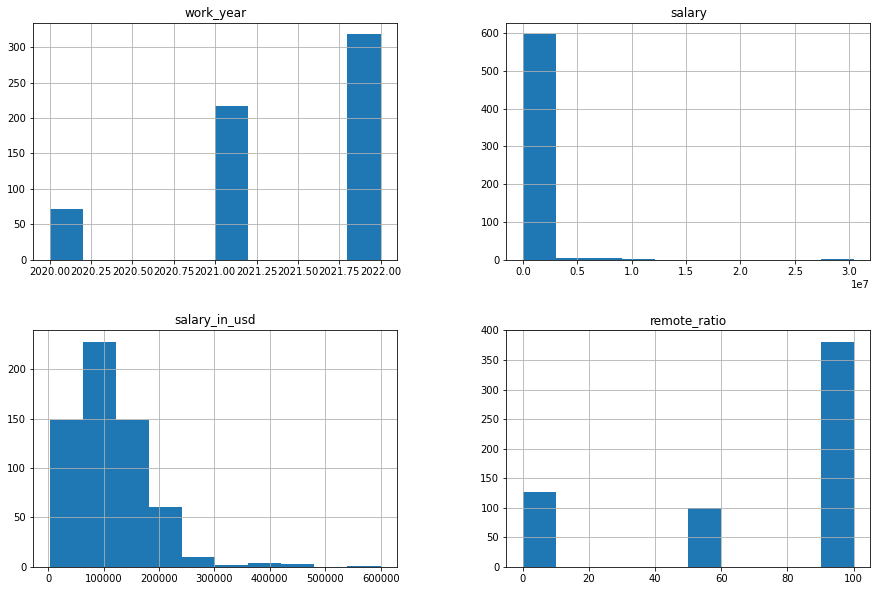

In [8]:
data.hist(bins = 10, figsize = (15,10))

In [9]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


<AxesSubplot:xlabel='experience_level', ylabel='Count'>

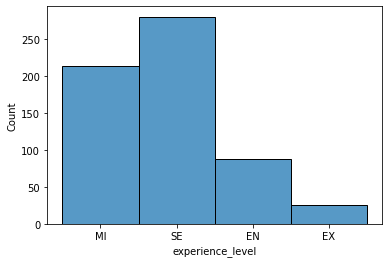

In [10]:
sns.histplot(data.experience_level)

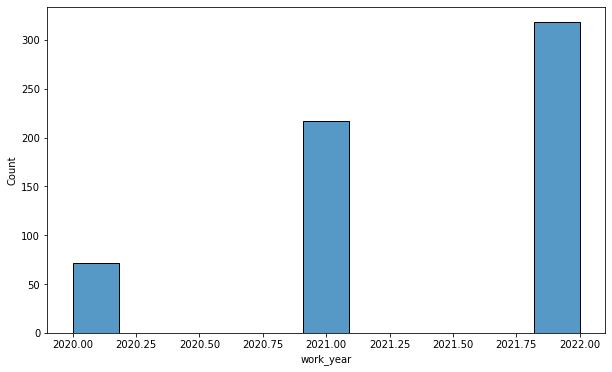

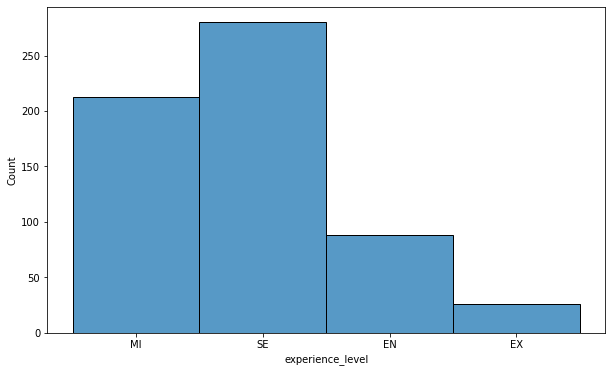

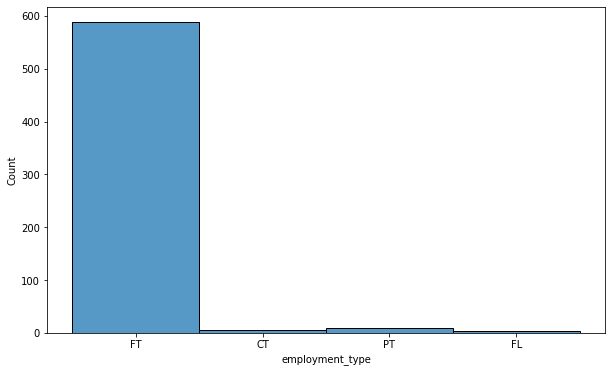

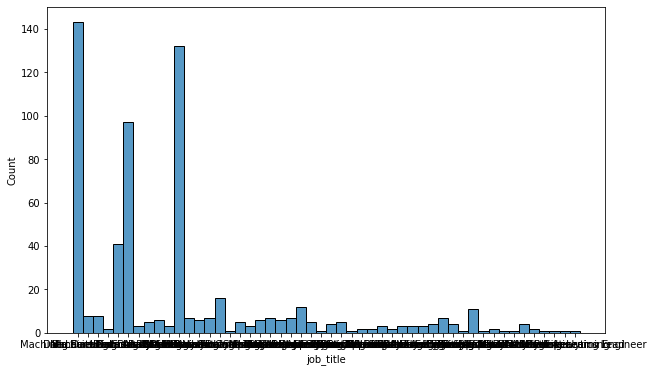

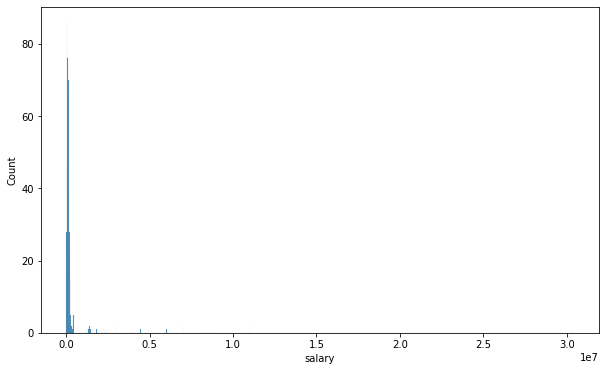

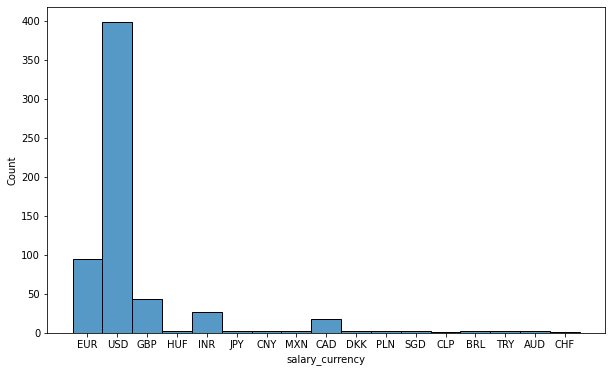

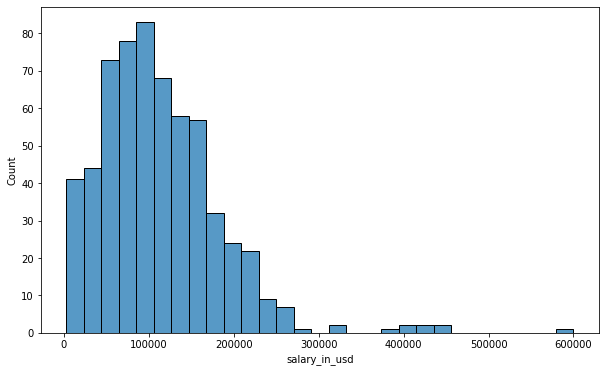

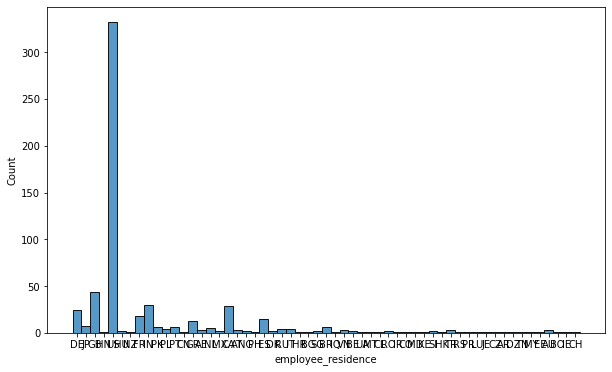

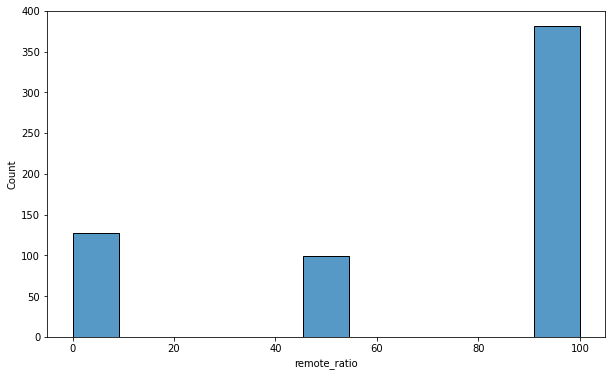

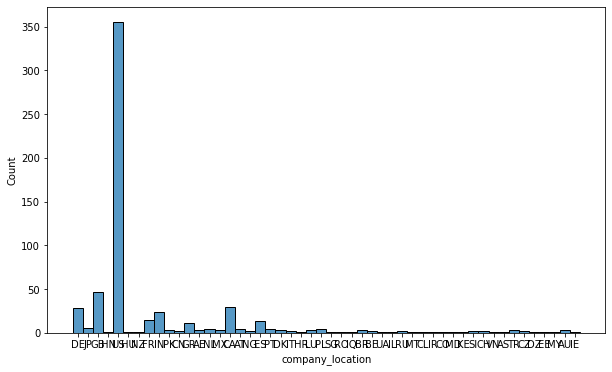

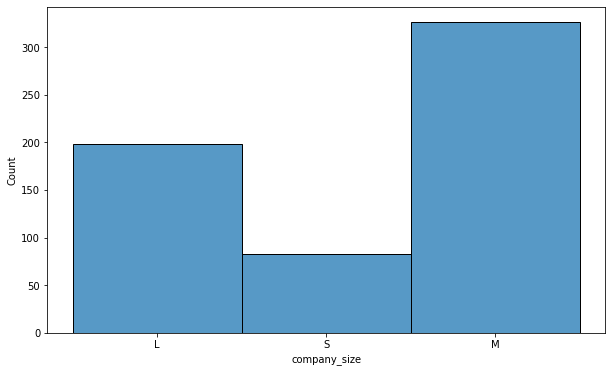

In [11]:
for col in data.columns:
    plt.figure(figsize = (10,6))
    sns.histplot(data[col])

In [12]:
max_categories = [col for col in data.columns if len(data[col].unique()) > 15 and col != 'salary']

In [13]:
max_categories

['job_title',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'company_location']

<AxesSubplot:xlabel='employment_type', ylabel='salary'>

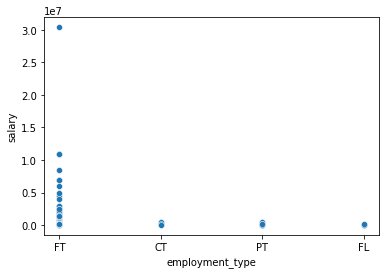

In [14]:
sns.scatterplot(x = 'employment_type', y = 'salary', data = data)

In [15]:
corr_matrix = data.corr()
corr_matrix['salary'].sort_values(ascending = False)

salary           1.000000
remote_ratio    -0.014608
salary_in_usd   -0.083906
work_year       -0.087577
Name: salary, dtype: float64

In [16]:
job_title_cat = data.groupby('job_title')['job_title'].agg('count').sort_values(ascending = False)
job_title_cat_other = job_title_cat[job_title_cat <= 3]
data.job_title = data.job_title.apply(lambda x: 
                                     'other' if x in job_title_cat_other else x)

job_title_cat

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Director of Data Science                      7
AI Scientist                                  7
Principal Data Scientist                      7
Data Science Consultant                       7
Data Analytics Manager                        7
Computer Vision Engineer                      6
BI Data Analyst                               6
ML Engineer                                   6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Applied Data Scientist        

In [17]:
emp_res_cat = data.groupby('employee_residence')['employee_residence'].agg('count').sort_values(ascending = False)
emp_res_cat_other = emp_res_cat[emp_res_cat <= 2]
data.employee_residence = data.employee_residence.apply(lambda x: 'other' if x in emp_res_cat_other else x)


In [18]:
com_loc_cat = data.groupby('company_location')['company_location'].agg('count').sort_values(ascending=False)
com_loc_cat_other = com_loc_cat[com_loc_cat<=2]
data.company_location = data.company_location.apply(lambda x: 'other' if x in com_loc_cat_other else x )

In [19]:
[col for col in data.columns if len(data[col].unique()) > 30]

['salary', 'salary_in_usd']

In [20]:
data.shape

(607, 11)

In [21]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data,test_size=0.2,random_state=38)

In [22]:
train = data.drop('salary',axis=1)
train_labels = data['salary'].copy()

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
pipeline= Pipeline([
    ('one_hot_cat', OneHotEncoder())
])
train_pipelined = pipeline.fit_transform(train)

In [24]:
train_pipelined.shape

(607, 474)

In [25]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(train_pipelined,train_labels)

LinearRegression()

In [26]:
rand_features = train.iloc[:5]
rand_labels = train_labels.iloc[:5]

rand_pipelined = pipeline.transform(rand_features)

In [27]:
lr_model.predict(rand_pipelined)

array([ 70000.81925409, 260000.84544294,  84997.41567587,  20000.45765365,
       149997.26043518])

In [28]:
list(rand_labels)

[70000, 260000, 85000, 20000, 150000]

In [29]:
test = test_data.drop('salary',axis=1)
test_labels = test_data['salary'].copy()

In [30]:
test_pipelined = pipeline.transform(test)

In [31]:
lr_pred = lr_model.predict(test_pipelined)

In [32]:
from sklearn.metrics import mean_squared_error

lr_model.score(test_pipelined,test_labels)

0.9999999999993617

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_reg.fit(train_pipelined,train_labels)

DecisionTreeRegressor()

In [34]:
tree_reg.score(test_pipelined,test_labels)

1.0

In [35]:
job_title_cat_other

job_title
Machine Learning Developer                  3
Machine Learning Infrastructure Engineer    3
Lead Data Scientist                         3
Lead Data Analyst                           3
Data Science Engineer                       3
Principal Data Engineer                     3
Computer Vision Software Engineer           3
Principal Data Analyst                      2
Financial Data Analyst                      2
ETL Developer                               2
Director of Data Engineering                2
Product Data Analyst                        2
Cloud Data Engineer                         2
NLP Engineer                                1
Marketing Data Analyst                      1
3D Computer Vision Researcher               1
Machine Learning Manager                    1
Lead Machine Learning Engineer              1
Head of Machine Learning                    1
Finance Data Analyst                        1
Data Specialist                             1
Data Analytics Lead     